In [1]:
print("retest")

# FOLD = '/content/'
FOLD = '/kaggle/working/'
import os

retest


In [2]:
import shutil

# Function to remove a folder and its contents
def remove_folder(path):
    try:
        shutil.rmtree(path)
        print(f"Folder {path} and its contents successfully removed.")
    except OSError as e:
        print(f"Error: {e.strerror}")

# Specify the path of the folder to be removed
folder_path = os.path.join(FOLD, 'dataset')

# Call the function to remove the folder
remove_folder(folder_path)

Error: No such file or directory


In [2]:
!git clone https://github.com/QuanHoangNgoc/Container.git dataset

Cloning into 'dataset'...
remote: Enumerating objects: 6739, done.
remote: Total 6739 (delta 0), reused 0 (delta 0), pack-reused 6739
Receiving objects: 100% (6739/6739), 140.80 MiB | 39.10 MiB/s, done.
Updating files: 100% (7024/7024), done.


# "Source code" 

In [3]:
######################################################################################
# Const
######################################################################################
CLEAR_LOG = True  # clear file log (if need)
example_code = True

TYPE = 'COLOR'
SIZE = (240, 240)
VALUE = [0, 255]


In [4]:
######################################################################################
# Set Up
######################################################################################
import skimage as ski
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import math


if (example_code):
    print("ski version: ", ski.__version__)
    print("numpy version: ", np.__version__)
    print("pandas version: ", pd.__version__)
    print("sklearn version: ", skl.__version__)


ski version:  0.22.0
numpy version:  1.26.4
pandas version:  2.2.2
sklearn version:  1.2.2


In [5]:
######################################################################################
# Utils
######################################################################################
import logging
from absl import logging as absl_logging
from skimage import io, exposure
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import inspect


######################################################################################################
# NORMAL UTIL
######################################################################################################
def get_current_method_name(index=2):
    current_frame = inspect.stack()[index]
    method_name = current_frame.function
    return "<" + method_name + ">"


NUM_PRT_SC = int(1e18)


def setup_logging():
    # Set the log file path
    _log_file = os.path.join(os.getcwd(), '_log')
    if not os.path.exists(_log_file):
        os.makedirs(_log_file)
    _log_file = os.path.join(_log_file, 'log.txt')
    if (CLEAR_LOG and os.path.exists(_log_file)):
        os.remove(_log_file)

    # format = "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
    # Configure the Python logging to write to the log file
    logging.basicConfig(filename=_log_file, level=logging.INFO, format=None)
    # Redirect absl logging to the Python logging
    absl_logging.use_python_logging()
    absl_logging.info("\n\n")


setup_logging()


class ut:
    _active = True

    def __init__(self):
        pass

    def act(active):
        ut._active = active
        global NUM_PRT_SC
        if NUM_PRT_SC > 2:
            NUM_PRT_SC = 2
        else:
            NUM_PRT_SC = int(1e18)

    def prt_section():
        global NUM_PRT_SC
        if NUM_PRT_SC < 1:
            return
        else:
            NUM_PRT_SC -= 1
        logging.info("~" * int(77 * 1))
        print("~" * int(77 * 1), flush=True)

    def mess(*mess):
        if ut._active == False:
            return
        ut.prt_section()
        out = '# '
        func_dir = get_current_method_name()
        if (func_dir not in ['<over>', '<note_verbose>']):
            out += get_current_method_name() + "\n"

        for arg in mess:
            out += str(arg) + " "
        global absl_logging
        absl_logging.info(out)
        print(out, flush=True)
        ut.prt_section()

    def note_verbose(flag, title):
        if ut._active == False:
            return
        func_dir = get_current_method_name()
        # ut.prt_section()
        ut.mess("__verbose__:", func_dir, "\n", "@@@", title)
        # ut.prt_section()

    def over(val, var_name=None):
        if ut._active == False:
            return
        if var_name == None:
            var_name = "{}".format(get_current_method_name())
        else:
            var_name = "{1} \n [{0}]".format(var_name,
                                             get_current_method_name())
        # ut.prt_section()
        try:
            ratio = val.std()**2/(val.max()-val.min()) * 100
            ratio = round(ratio, 2)
            ut.mess(
                "__var__:",
                var_name + "\n",
                [(val.dtype, type(val)), val.shape], "\n",
                [(val.min(), val.max()), (val.mean(),
                                          val.std() ** 2, str(ratio) + " %")], "\n",
                [np.sum(np.isnan(val)), str(
                    round(sys.getsizeof(val)/10**6, 2)) + " Mb"],
            )
        except:
            try:
                ut.mess(
                    "__var__:",
                    var_name + "\n",
                    (type(val), len(val), "no-min-max-mean"),
                )
            except:
                ut.mess(
                    "__var__:",
                    var_name + "\n",
                    (type(val), "no-shape", "no-min-max-mean"),
                )
        # ut.prt_section()

    def error(tilte):
        func_dir = get_current_method_name()
        # ut.prt_section()
        ut.mess("__error__:", func_dir, "@@@", tilte)
        # ut.prt_section()
        assert 1 == 0


In [6]:
######################################################################################################
# SKI UTIL
######################################################################################################
def retype_image(image: np.ndarray, istype: str):
    if (istype not in ['float', 'ubyte', 'int']):
        ut.error()
    if (istype == 'float'):
        return ski.util.img_as_float(image)
    if (istype == 'ubyte'):
        return ski.util.img_as_ubyte(image)
    if (istype == 'int'):
        return ski.util.img_as_int(image)
    ut.error()


def revalue_image(image, in_range, out_range):
    return ski.exposure.rescale_intensity(image, in_range=in_range, out_range=out_range)


def show_image(image: np.ndarray, choose=1):
    try:
        assert (choose == 0)
        out = ski.util.img_as_uint(image) # Convert to int
        plt.imshow(out)
        plt.axis('off')  # Optional: to hide the axis
        plt.show()
    except:
        # Display the image using skimage's viewer
        out = ski.util.img_as_uint(image) # Convert to int
        print('cmap = gray')
        plt.imshow(out, cmap='gray')
        plt.axis('off')  # Optional: to hide the axis
        plt.show()


def read_image(path: str, as_gray=True):
    image = ski.io.imread(path, as_gray=as_gray)
    image = ski.img_as_float(image)
    return image

def recolor_image(image, channel):
    if (channel not in ['gray', 'rgb']):
        ut.error()
    if (channel == 'gray'):
        return ski.color.rgb2gray(image)
    if (channel == 'rgb'):
        return ski.color.gray2rgb(image)
    ut.error()


def show_his(image):
    try:
        colors = ('red', 'green', 'blue')
        for color, channel in zip(colors, image.transpose((2, 0, 1))):
            hist, hist_centers = exposure.histogram(channel)
#             hist /= len(hist.flatten())
            plt.fill_between(hist_centers, hist, label=color, alpha=0.3)
        plt.legend()
        plt.title('Histogram for Each Color Channel')
    except:
        # Compute the histogram
        hist, hist_centers = exposure.histogram(image)
#         hist /= len(hist.flatten())
        # Display the histogram
        plt.fill_between(hist_centers, hist, alpha=0.3)
        plt.title('Histogram of Grayscale Image')
    plt.xlabel('Pixel intensity')
    plt.ylabel('Frequency')
    plt.show()


In [7]:
######################################################################################################
# Random files
######################################################################################################
import random
def get_random_file_in_folder(root_folder, K):
    lis = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            file_path = os.path.join(root, file)
            lis.append(file_path)
    random.shuffle(lis)
    return lis[:K]


# Data

In [8]:
from skimage import color, io
SIZE = (240, 240, 3)
VALUE = 'ubyte'


def get_X_from_folder(folder_path):
    files = os.listdir(folder_path)
    files = sorted(files) # Fixed
    X = []
    for filename in files:
        path = os.path.join(folder_path, filename)
        org_image = io.imread(path) # Color 
        # Resize image -> Retype image 
        org_image = ski.transform.resize(org_image, SIZE, anti_aliasing=True)
        org_image = retype_image(org_image, 'ubyte')
        X.append(org_image)
    X = np.array(X)
    return X


In [9]:
from sklearn.model_selection import train_test_split


def create_data(num_few=32, seed=42, name='Testing'):
    X = get_X_from_folder(FOLD + '/dataset/' + name + '/notumor')
    X_train, X_test = train_test_split(X, test_size=num_few, random_state=seed)
    X1 = X_test

    X = get_X_from_folder(FOLD + '/dataset/' + name + '/glioma')
    X_train, X_test = train_test_split(X, test_size=num_few, random_state=seed)
    X2 = X_test

    # Merge
    X = np.concatenate((X1, X2), axis=0)
    Y = [0] * num_few + [1] * num_few
    Y = np.array(Y)
    # Y = Y.reshape(-1, 1)
    return X, Y


In [11]:
if(example_code):
    X, Y = create_data()
    ut.over(X, "X")
    ut.over(Y, "Y")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [X]
 [(dtype('uint8'), <class 'numpy.ndarray'>), (64, 240, 240, 3)] 
 [(0, 255), (48.34201108579283, 3082.749898624808, '1208.92 %')] 
 [0, '11.06 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# __var__: <<module>> 
 [Y]
 [(dtype('int64'), <class 'numpy.ndarray'>), (64,)] 
 [(0, 1), (0.5, 0.25, '25.0 %')] 
 [0, '0.0 Mb'] 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


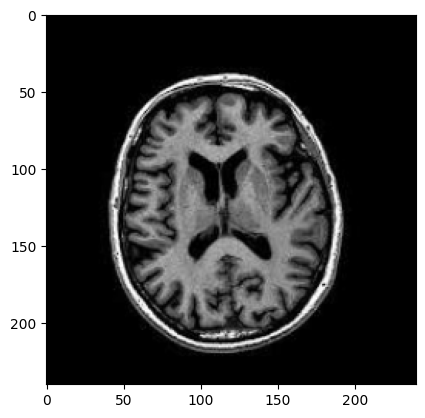

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# <<module>>
13 0 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [13]:
if(example_code): 
    i = random.randint(0, len(X))
    plt.imshow(X[i])
    plt.show()
    ut.mess(i, Y[i])
    

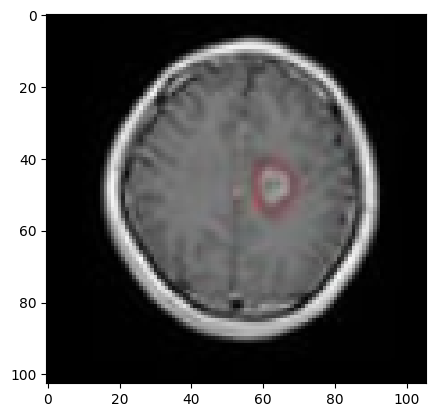

In [20]:
image = io.imread('/kaggle/input/image1/P2.png')
plt.imshow(image)
plt.show()


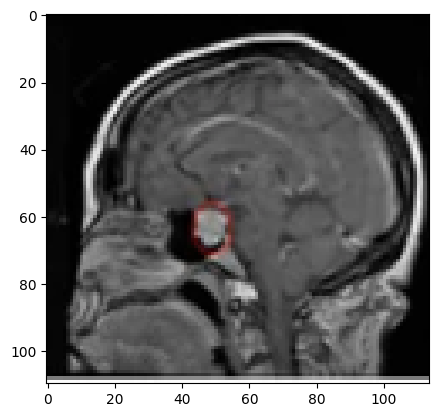

In [22]:
image = io.imread('/kaggle/input/image1/P1.png')
plt.imshow(image)
plt.show()


In [10]:
df = pd.DataFrame({
    'name': ['#train', '#test'], 
    'num': [200, 300]
})

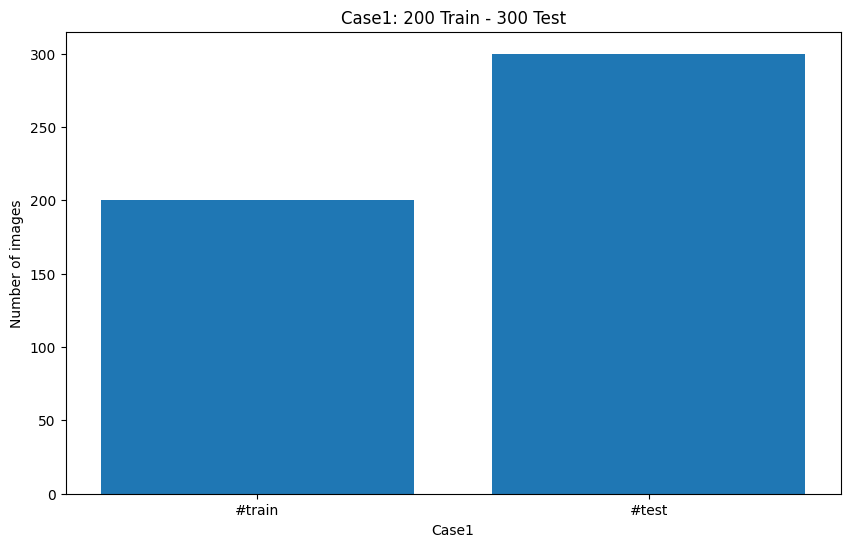

In [47]:
# Plotting the column graph
plt.figure(figsize=(10, 6))
plt.bar(df['name'], df['num'])
plt.xlabel('Case1')
plt.ylabel('Number of images')
plt.title('Case1: 200 Train - 300 Test')
plt.show()


In [48]:
df = pd.DataFrame({
    'name': ['#train', '#test'], 
    'num': [400, 100]
})

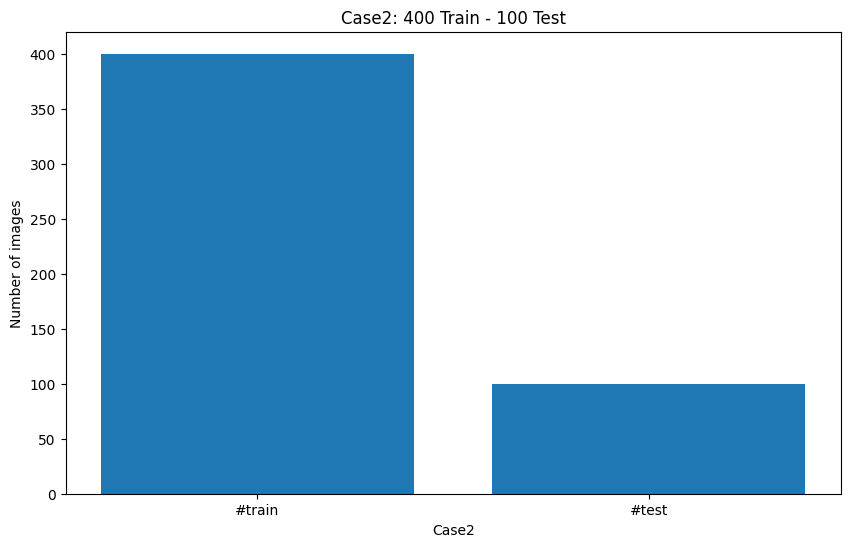

In [50]:
# Plotting the column graph
plt.figure(figsize=(10, 6))
plt.bar(df['name'], df['num'])
plt.xlabel('Case2')
plt.ylabel('Number of images')
plt.title('Case2: 400 Train - 100 Test')
plt.show()


# Result

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a dataframe
df = pd.read_csv('/kaggle/input/data-result/dqn_200_500.csv')

In [49]:
df

,Unnamed: 0,200_500_train,200_500_test
0,0,98,245
1,1,98,245
2,2,98,245
3,3,98,245
4,4,98,245
...,...,...,...
995,995,200,474
996,996,200,461
997,997,200,463
998,998,200,471


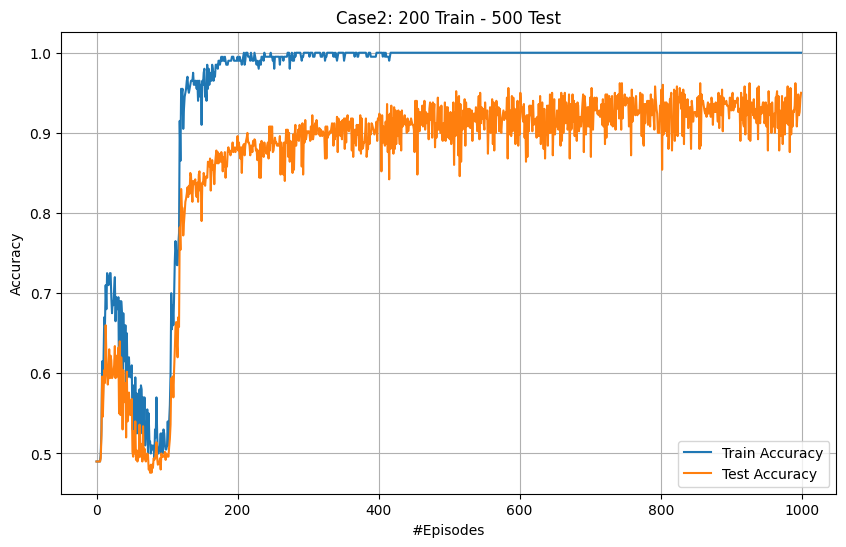

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(df['200_500_train']) / 200, label='Train Accuracy')
plt.plot(np.array(df['200_500_test']) / 500, label='Test Accuracy')

plt.legend() 
plt.xlabel('#Episodes')
plt.ylabel('Accuracy')
plt.title('Case2: 200 Train - 500 Test')
plt.grid(True)
plt.show()

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a dataframe
dftmp = pd.read_csv('/kaggle/input/data-result/double_dqn_200_500.csv')

In [53]:
dftmp

,Unnamed: 0,200_500_train,200_500_test
0,0,120,257
1,1,120,257
2,2,120,257
3,3,120,257
4,4,120,257
...,...,...,...
895,895,200,497
896,896,200,496
897,897,200,490
898,898,200,495


In [57]:
df_new = []
for i in range(len(dftmp)): 
    df_new.append(dftmp.iloc[i].values.tolist()[1:])
    if((i+1) % 9 == 0): 
        df_new.append(dftmp.iloc[i].values.tolist()[1:])

df2 = pd.DataFrame(df_new, columns=['200_500_train', '200_500_test'])
df2

,200_500_train,200_500_test
0,120,257
1,120,257
2,120,257
3,120,257
4,120,257
...,...,...
995,200,496
996,200,490
997,200,495
998,200,479


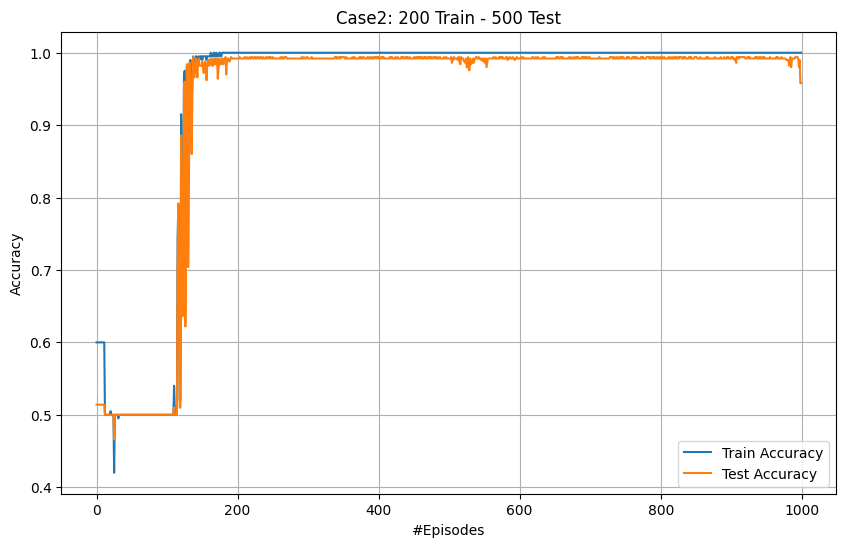

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(df2['200_500_train']) / 200, label='Train Accuracy')
plt.plot(np.array(df2['200_500_test']) / 500, label='Test Accuracy')

plt.legend() 
plt.xlabel('#Episodes')
plt.ylabel('Accuracy')
plt.title('Case2: 200 Train - 500 Test')
plt.grid(True)
plt.show()


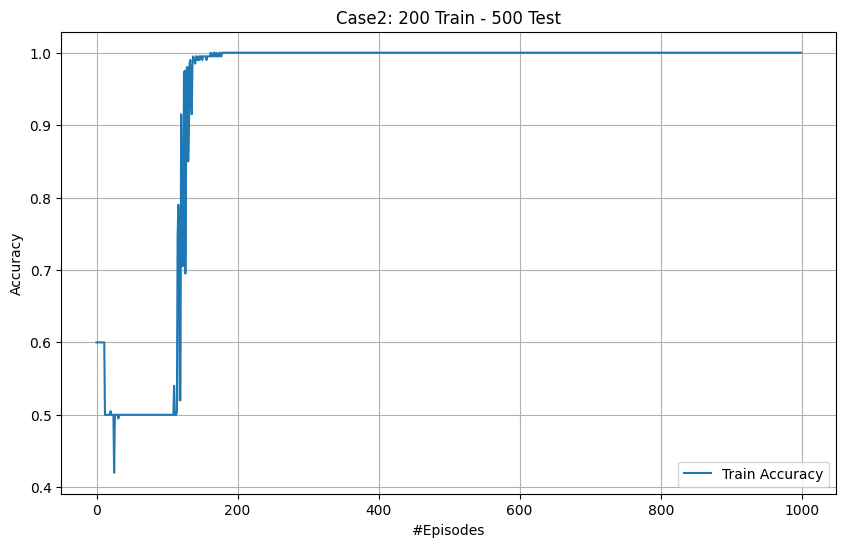

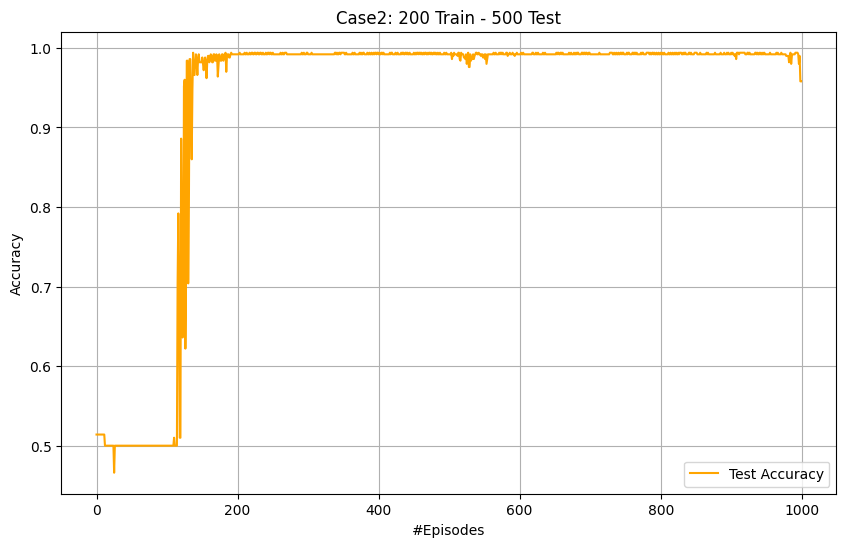

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(df2['200_500_train']) / 200, label='Train Accuracy')

plt.legend() 
plt.xlabel('#Episodes')
plt.ylabel('Accuracy')
plt.title('Case2: 200 Train - 500 Test')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.array(df2['200_500_test']) / 500, label='Test Accuracy', color='orange')

plt.legend() 
plt.xlabel('#Episodes')
plt.ylabel('Accuracy')
plt.title('Case2: 200 Train - 500 Test')
plt.grid(True)
plt.show()


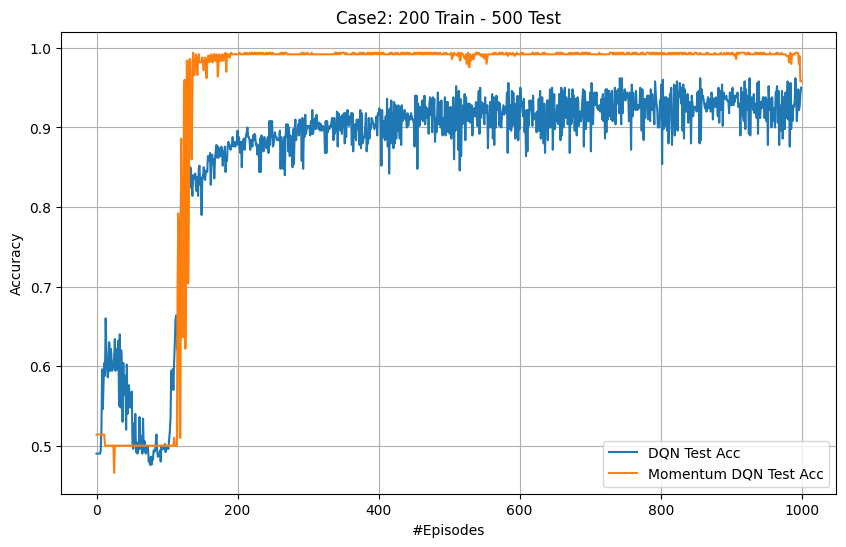

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(df['200_500_test']) / 500, label='DQN Test Acc')
plt.plot(np.array(df2['200_500_test']) / 500, label='Momentum DQN Test Acc')

plt.legend() 
plt.xlabel('#Episodes')
plt.ylabel('Accuracy')
plt.title('Case2: 200 Train - 500 Test')
plt.grid(True)
plt.show()

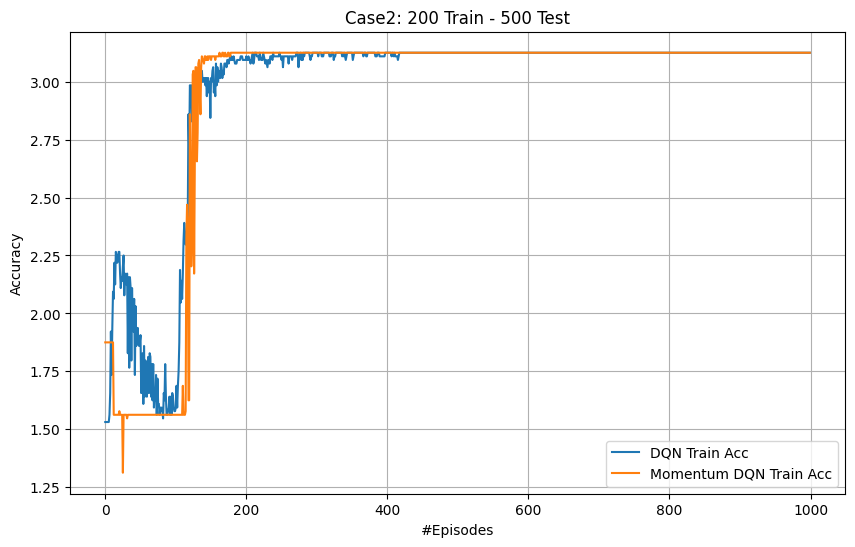

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(df['200_500_train']) / 64, label='DQN Train Acc')
plt.plot(np.array(df2['200_500_train']) / 64, label='Momentum DQN Train Acc')

plt.legend() 
plt.xlabel('#Episodes')
plt.ylabel('Accuracy')
plt.title('Case2: 200 Train - 500 Test')
plt.grid(True)
plt.show()